# VICTOR Notebook on 2D steady-state diffusion

### Finite Differences

We saw that the 1D diffusion equation can be represented by algebraic expressions that are easily solved using finite differences (see the "erodocone notebook for instance). Now let's look at a 2D equation, like the steady conduction of heat. If there are no sources of sinks of heat, the steady conduction of heat is solved using LaPlace's equation:
$$ \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} = 0 $$
where $T$ is temperature, $x$ is distance, say in the East direction, and $y$ is distance measured orthogonal to $x$, say in the North direction. LaPlace's equation says that the flow into a small region must equal the flow out of that region. 

In finite difference approximations, we use algebraic expressions to replace the partial derivatives.


The second partial derivative with respect to $x$ is found by taking the differences of the approximated $\frac{\partial T}{\partial x}$, as before:

$$ \frac{\partial^2 T}{\partial x^2}  = \frac{1}{\Delta x} \left [\frac{T(x + \Delta x) - T(x)}{\Delta x} - \frac{T(x) - T(x - \Delta x)}{\Delta x} \right ] $$

$$ \frac{\partial^2 T}{\partial x^2}  = \frac{T(x + \Delta x) - 2T(x) + T(x - \Delta x)}{\Delta x^2} $$

The second partial derivative of $T$ with respect to $y$ is exactly the same as for $x$:
The finite difference approximation to the 1D thermal condition equation is:

$$ \frac{\partial^2 T}{\partial y^2}  = \frac{1}{\Delta y} \left [\frac{T(y + \Delta y) - T(y)}{\Delta y} - \frac{T(y) - T(y - \Delta y)}{\Delta y} \right ] $$



$$ \frac{\partial^2 T}{\partial y^2}  = \frac{T(y + \Delta y) - 2T(y) + T(y - \Delta y)}{\Delta y^2} $$

This equation can be re-arranged to give the temperature at a point $x,y$, given the temperature's around the point, satisfying LaPlace's equation.


$$ T(x,y)  = \frac{1}{4} \left [ T(x, y+1) + T(x, y-1) + T(x+1, y) + T(x-1, y) \right ] $$ 
This simple equation works as long as the boundary conditions are set, and the grid is equilateral, that is $\Delta x = \Delta y$. 

### Boundary conditions

Everything is set to calculate the temperature at all points within a grid, given temperatures at the boundaries, or some similar conditions. As with the 1D transient thermal condition problem the boundary conditions must be specified.

The simplest boundary condition is called the Dirichlet boundary condition, for which 

$$ T(x+1) = \text{constant}_1 $$


$$ T(x-1) = \text{constant}_2 $$

$$ T(y+1) = \text{constant}_3 $$

$$ T(y-1) = \text{constant}_4 $$

For the temperature problem, this is equivalent to fixing the temperature at the boundaries of the mesh for all time. In this case the temperature along the grid will reach a steady-state which depends on the difference between the constants. 

### Gauss-Seidel Iteration

We have to find a solution for which the equation converges, so that the temperatures do not change in successive steps. A simple solution is called Gauss-Seidel iteration. In this method we basically sweep through the grid over and over until a steady-state solution, with relatively little error, is achieved. When the change between successive iterations is very small, we say that the solution has converged, and we assume this is the correct steady-state temperature distribution. 

Here is a simplified workflow (not exactly a flowchart!) to illustrate one Gauss-Seidel solution.


#### Step 1:
specify a square grid of dimension $N \times N$
#### Step 2: 
specify the level of error that is acceptable, say $E = 0.01^{\circ}$C.

#### Step 3:
Make a reasonable guess about the interior temperature. Say set all of the interior temperatures to 50\,$^{\circ}$C.

<pre><code data-trim id="block1">
For x = 1 to N-1
   For y = 1 to N-1
      T(x,y) = 50
   Next y
Next x
</code></pre>

#### Step 4:
specify the boundary conditions. For example the temperature on the North boundary might be set to 100\,$^{\circ}$C, so that T(x = 0...N, y=N) = 100\,$^{\circ}$C. The temperature on the other boundaries might be set to 0\,$^{\circ}$C or some other value.


#### Step 5:
Now do the Gauss-Seidel iteration

<pre><code data-trim id="block2">
Do while the maximum temperature error exceeds limit

   For x = 1 to N-1
      For y = 1 to N-1
         new_T(x,y) = 1/4[T(x-1,y) + T(x+1,y) + T(x,y-1) + T(x,y+1)]
      Next y
   Next x
   
   For x = 1 to N-1
      For y = 1 to N-1
         find the maximum temperature error
      Next y
   Next x
   
   For x = 1 to N-1
      For y = 1 to N-1
         T(x,y) = new_T(x,y) 
      Next y
   Next x
 
Loop
</code></pre>

#### Step 6:
Print and visualize the results.

### Test implementation


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
#run a test case with simple boundary conditions

## Step 1
#specify model space #meters
w = h = 51.

## Step 2
# specify the acceptable error
error_limit = 0.01 # deg C

## Step 3:
# make a reasonable guess about interior temperature
interior_temp = 50 # deg C

nx, ny = int(w), int(h)
u0 = interior_temp * np.ones((nx, ny))


## Step 4:
# specify boundary conditions

for i in range(nx):
    u0[i,0] = 20
    u0[i,nx-1] = 100

for j in range(ny):
    u0[0,j] = 20
    u0[ny-1, j] = 100

# Step 5
# G-S iteration
u = u0.copy()

max_error = 1
while (max_error > error_limit):
    
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            u[i,j] = 1/4*(u0[i-1,j] + u0[i+1,j] + u0[i,j-1] + u0[i,j+1])
    
    max_error = 0       
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            myerror = np.abs(u[i,j] - u0[i,j])
            
            if (myerror > max_error):
                max_error = myerror

    for i in range(1, nx-1):
        for j in range(ny-1):
            u0[i,j] = u[i,j]



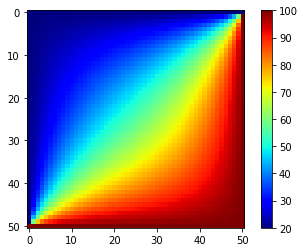

In [56]:
plt.imshow(u, cmap='jet', vmin=20, vmax=100)
plt.colorbar()
plt.show()


### Problem

Suppose you measure a geothermal gradient in one borehole and find it is 100\,$^{\circ}$C per kilometer. You find the geothermal gradient is a second borehole to be 400\,$^{\circ}$C per kilometer for the upper 250 meters, then becomes isothermal with depth. That is, the temperature at the base of both boreholes at one kilometer depth is 100\,$^{\circ}$C. Assume the surface temperature in 20\,$^{\circ}$C. The two boreholes are one kilometer apart. Find the steady-state temperature distribution, assuming conduction (a big assumption!!), between the two boreholes.


#### Solution

It is the same code, we just have to change the boundary conditions, as follows

In [65]:
#run a test case with simple boundary conditions

## Step 1
#specify model space #meters
w = h = 50.

## Step 2
# specify the acceptable error
error_limit = 0.001 # deg C

## Step 3:
# make a reasonable guess about interior temperature
interior_temp = 50 # deg C

nx, ny = int(w), int(h)
u0 = interior_temp * np.ones((nx, ny))


## Step 4:
# specify boundary conditions

for j in range(ny):
    u0[0,j] = 20  #top boundary
    u0[ny-1,j] = 100  #bottom boundary

for i in range(ny):
    u0[i,0] = 20 + (100-20)*i/nx  # left boundary
    
    if (i < int(ny/4)):
        u0[i,nx-1] = 20 + (400-20)*i/nx  # right boundary
    else:
        u0[i,nx-1] = 100

# Step 5
# G-S iteration
u = u0.copy()

max_error = 1
while (max_error > error_limit):
    
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            u[i,j] = 1/4*(u0[i-1,j] + u0[i+1,j] + u0[i,j-1] + u0[i,j+1])
    
    max_error = 0       
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            myerror = np.abs(u[i,j] - u0[i,j])
            
            if (myerror > max_error):
                max_error = myerror

    for i in range(1, nx-1):
        for j in range(ny-1):
            u0[i,j] = u[i,j]



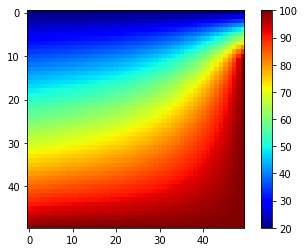

In [66]:
plt.imshow(u, cmap='jet', vmin=20, vmax=100)
plt.colorbar()
plt.show()

### Notes

Notice there is no need to specify a diffusivity in the steady-state formulation. Since the steady-state answer is not time dependent, the diffusivity (m$^2$/s) can be ignored. It might take some systems longer to achieve steady-state, but here we are only concerned with the stead-state answer.

The steady-state answer is completely dependent on the boundary conditions we choose for the model. There are a variety of boundary conditions. In this case, constant temperature boundary conditions were chosen. The boundary condition might also be constant flux, or zero flux (von Neumann boundary condition). 

The initial temperature we chose for the interior points was just a guess. Consider how this guess impacts the time it takes to reach a steacdy-state solution using Gauss-Seidel iteration.

